# Clustering

## Pig_Data_Elbow

In [24]:
pip  install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np

# import
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# the scikit-learn library
from sklearn.cluster import KMeans

In [2]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [12]:


data = pd.read_csv('C:/Users/Bella/OneDrive - Wageningen University & Research/Desktop/Data_Science _for_Smart_Environments/pigdata.csv',delimiter = ';')
data['RegioS'] = data['RegioS'].str.strip()
data.head(10)


,ID,RegioS,Perioden,VarkensTotaal_121
0,2759,GM1680,2019JJ00,0.0
1,2779,GM0738,2019JJ00,NaN
2,2799,GM0358,2019JJ00,2.0
3,2819,GM0197,2019JJ00,81861.0
4,2839,GM0480,2019JJ00,NaN
5,2859,GM0305,2019JJ00,NaN
6,2879,GM0059,2019JJ00,18744.0
7,2899,GM0360,2019JJ00,NaN
8,2919,GM0482,2019JJ00,1145.0
9,2939,GM0613,2019JJ00,10.0


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


C:\Users\Bella\AppData\Local\Temp\ipykernel_26124\312272465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['VarkensTotaal_121'].fillna(0, inplace=True)
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklea

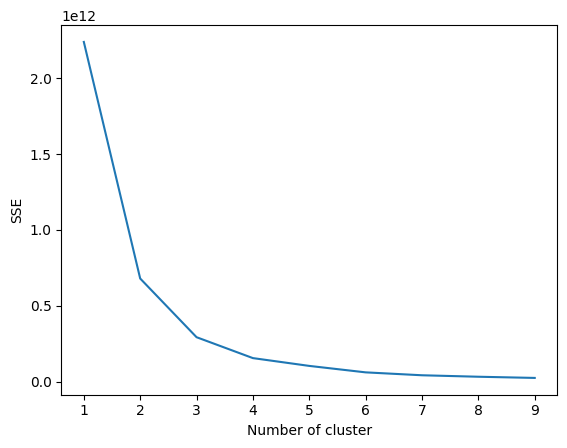

In [14]:
#first replace NaN with 0
data['VarkensTotaal_121'].fillna(0, inplace=True)

#copy the 'VarkensTotaal_121' into an array (oke series) 
data_clustervars = data[['VarkensTotaal_121']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,n_init=150).fit(data_clustervars)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



In [16]:
data.head(10)

,ID,RegioS,Perioden,VarkensTotaal_121,clusters
0,2759,GM1680,2019JJ00,0.0,5
1,2779,GM0738,2019JJ00,0.0,5
2,2799,GM0358,2019JJ00,2.0,5
3,2819,GM0197,2019JJ00,81861.0,3
4,2839,GM0480,2019JJ00,0.0,5
5,2859,GM0305,2019JJ00,0.0,5
6,2879,GM0059,2019JJ00,18744.0,0
7,2899,GM0360,2019JJ00,0.0,5
8,2919,GM0482,2019JJ00,1145.0,5
9,2939,GM0613,2019JJ00,10.0,5


In [18]:
print(sse)

{1: 2238044438327.1396, 2: 680134261841.0365, 3: 293669531886.7994, 4: 155996832977.021, 5: 104658422404.9972, 6: 62126044402.66518, 7: 42990793480.850075, 8: 33302223435.252666, 9: 25518648962.727207}


## Elbow_Method_1

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])


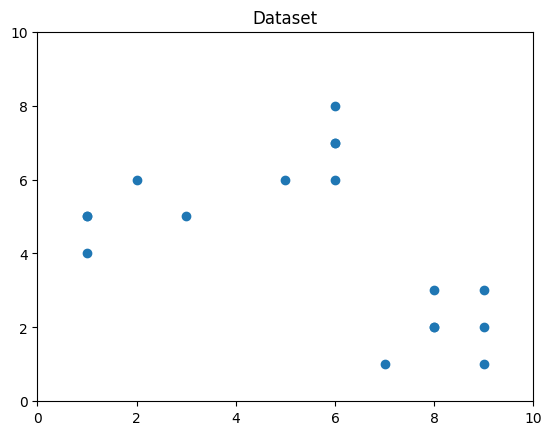

In [22]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.p

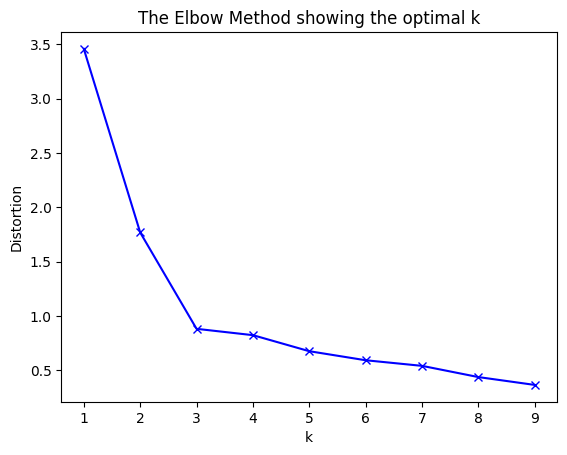

In [24]:



# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

## PigData_Map

In [40]:

import numpy as np

# import
import pandas as pd
# import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
# import seaborn
#import seaborn as sns
#%matplotlib inline
#import cbsodata
#from shapely.geometry import Point
from sklearn.cluster import KMeans
#metadata = pd.DataFrame(cbsodata.get_meta('83983NED', 'DataProperties'))
#metadata



In [50]:
import cbsodata

#data = pd.DataFrame(cbsodata.get_data('80781ned', select = ['RegioS', 'VarkensTotaal_121', 'Perioden']))
data = pd.read_csv('C:/Users/Bella/OneDrive - Wageningen University & Research/Desktop/Data_Science _for_Smart_Environments/pigdata.csv',delimiter = ';')
data['RegioS'] = data['RegioS'].str.strip()



In [44]:
pip install cbsodata

Note: you may need to restart the kernel to use updated packages.


In [52]:
#first replace NaN with 0
data['VarkensTotaal_121'].fillna(0, inplace=True)

data_clustervars = data[['VarkensTotaal_121']]


kmeans = KMeans(n_clusters=10, max_iter=1000,n_init=150).fit(data_clustervars)
centroids = kmeans.cluster_centers_
data['cluster'] = kmeans.labels_
display()
#data.head(10)
print(type(data))

C:\Users\Bella\AppData\Local\Temp\ipykernel_26124\3937316315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['VarkensTotaal_121'].fillna(0, inplace=True)
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>


In [60]:
# Haal de kaart met gemeentegrenzen op van PDOK
import json
from owslib.wfs import WebFeatureService

# Put the WFS url in a variable
wfsUrl = 'https://service.pdok.nl/cbs/wijkenbuurten/2021/wfs/v2_0?'

# Create a WFS object
wfs = WebFeatureService(url=wfsUrl, version='2.0.0')

# Get the title from the object
print(wfs.identification.title)

# Check the contents of the WFS
print(list(wfs.contents))



CBS Wijken en Buurten 2021 versie 3
['wijkenbuurten:buurten', 'wijkenbuurten:wijken', 'wijkenbuurten:gemeenten']


In [58]:
pip install owslib


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------------------ --------- 2.9/3.8 MB 12.9 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 13.4 MB/s eta 0:00:00


In [62]:
layer = list(wfs.contents)[2]

response = wfs.getfeature(typename=layer, outputFormat='json')
datawfs = json.loads(response.read())

# Create GeoDataFrame, without saving first
gemeentegrenzen = gpd.GeoDataFrame.from_features(datawfs['features'])

# Set crs to RD New
gemeentegrenzen.crs = 28992



In [64]:
#gemeentegrenzen.head(5)


In [66]:
# Koppel CBS-data aan geodata met regiocodes
gemeentegrenzen = pd.merge(gemeentegrenzen, data, left_on = "gemeentecode", right_on = "RegioS")

gemeentegrenzen.columns

Index(['geometry', 'gemeentecode', 'gemeentenaam', 'water',
       'omgevingsadressendichtheid', 'stedelijkheidAdressenPerKm2',
       'bevolkingsdichtheidInwonersPerKm2', 'aantalInwoners', 'mannen',
       'vrouwen',
       ...
       'gemiddeldAantalMuseaBinnen5Km', 'gemiddeldAantalMuseaBinnen10Km',
       'gemiddeldAantalMuseaBinnen20Km', 'jrstatcode', 'jaar', 'ID', 'RegioS',
       'Perioden', 'VarkensTotaal_121', 'cluster'],
      dtype='object', length=207)

In [68]:
gemeentegrenzen.to_file(driver = 'ESRI Shapefile', filename= "varkenspergemeente2018.shp")

C:\Users\Bella\AppData\Local\Temp\ipykernel_26124\28364379.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gemeentegrenzen.to_file(driver = 'ESRI Shapefile', filename= "varkenspergemeente2018.shp")
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'gemeentecode' to 'gemeenteco'
  ogr_write(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'gemeentenaam' to 'gemeentena'
  ogr_write(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'omgevingsadressendichtheid' to 'omgevingsa'
  ogr_write(
C:\Users\Bella\anaconda3\envs\datascience\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'stedelijkheidAdressenPerKm2' to 'stedelijkh'
  ogr_write(
C:\Users\Bella\anacon

Text(0.5, 1.0, 'varkens per gemeente, 2018')

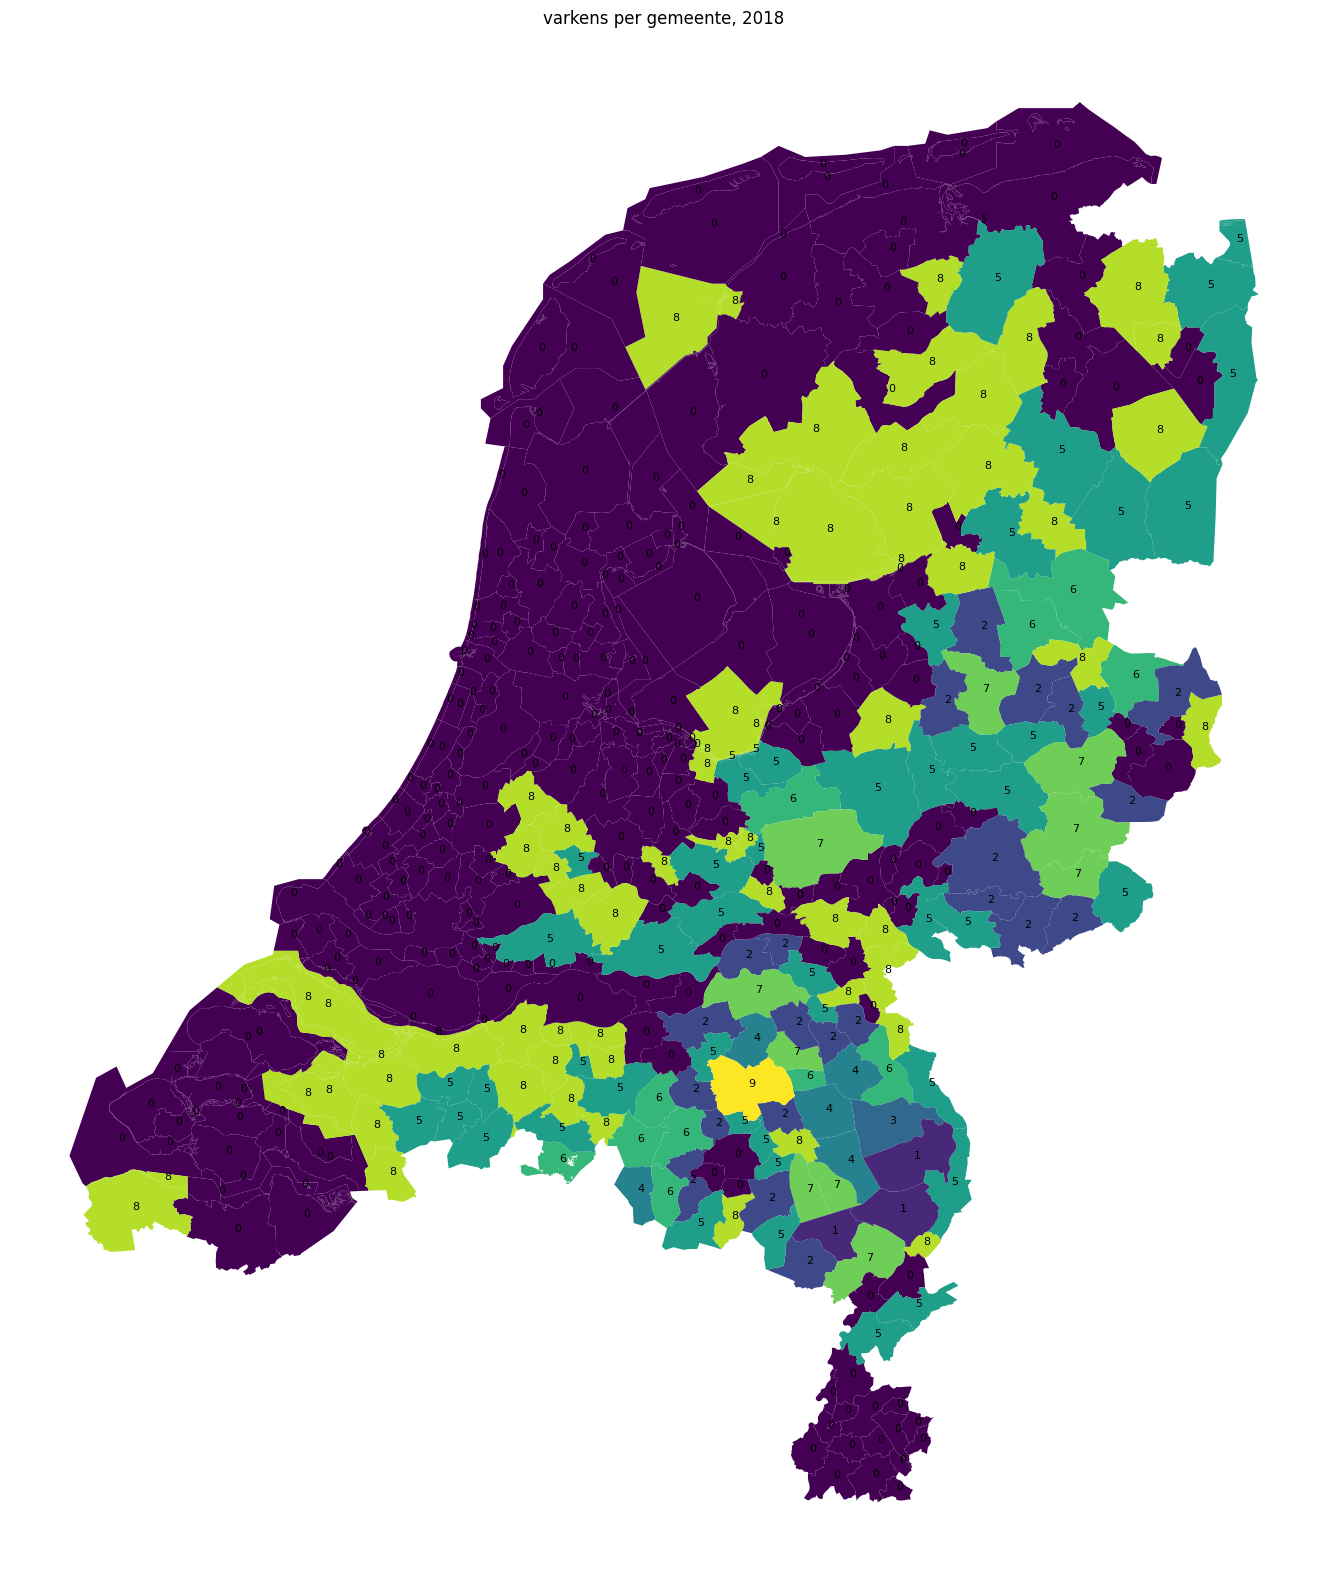

In [70]:



# Maak een thematische kaart
p = gemeentegrenzen.plot(column='cluster', figsize = (30,20))

#Some hassle to add annotation to the map
gemeentegrenzen["center"] = gemeentegrenzen["geometry"].centroid
gemeentegrenzen_points = gemeentegrenzen.copy()
gemeentegrenzen_points.set_geometry("center", inplace = True)
texts = []

for x, y, label in zip(gemeentegrenzen_points.geometry.x, gemeentegrenzen_points.geometry.y, gemeentegrenzen_points["cluster"]):
   texts.append(plt.text(x, y, label, fontsize = 8))


p.axis('off')
p.set_title('varkens per gemeente, 2018')


